In [1]:
import numpy as np

In [2]:
x = np.random.uniform(low=0.0, high=1.0, size=100)

print(x.shape)
x[0:10]

(100,)


array([ 0.36346485,  0.36364282,  0.76186016,  0.48854071,  0.38507109,
        0.93119767,  0.61497263,  0.51871936,  0.71000265,  0.69258948])

In [9]:
y = 0.3 * x
y[0:10]

array([ 0.10903945,  0.10909285,  0.22855805,  0.14656221,  0.11552133,
        0.2793593 ,  0.18449179,  0.15561581,  0.2130008 ,  0.20777684])

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

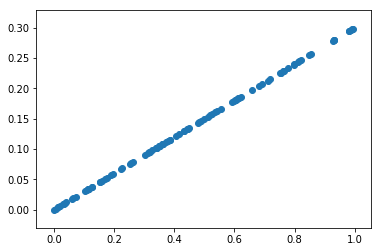

In [13]:
plt.scatter(x, y)

In [8]:
# 우리는 x와 y의 관계인 0.3을 알고있지만, 기계는 모르고 이걸 찾아보라고 시킨다고 가정.

### Case 1 - Random search

In [17]:
num_epoch = 100

best_w = None
best_epoch = None
best_error = 9999

for epoch in range(num_epoch):
    w = np.random.uniform(low=0.0, high=1.0)
    y_predict = w * x
    
    error = np.abs(y_predict - y).mean()
    
    if error < best_error:
        best_error = error
        best_w = w
        best_epoch = epoch
        
        print (best_epoch, best_w, best_error)
        
print("----" * 10)
print(best_epoch, best_w, best_error)


0 0.5536420273998437 0.113016443847
1 0.46483824241845784 0.0734477332444
3 0.17796263419970548 0.0543767499437
10 0.2879271074279055 0.00537937422842
77 0.2960649527487188 0.0017533570886
----------------------------------------
77 0.2960649527487188 0.0017533570886


### Case 2. h-step search

In [18]:
# h가 너무 작으면, 정해진 epoch 내에서 찾지 못할 수 있다. 따라서 h를 무엇으로 지정할 것인가는 성능에 중요한 영향을 준다.
# 그렇다면 h도 스스로 찾아준다면 어떨까?
# 따라서, 초기 w에서 발생하는 error가 크다면 h를 크게 조정하여 움직여주고, 아니면 더 작게 움직여준다; 이게 바로 Gradient Descent.

num_epoch = 100
h = 0.01

w = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w * x
    current_error = np.abs(y_predict - y).mean()
    
    y_predict = (w+h) * x
    h_plus_error = np.abs(y_predict - y).mean()
    if h_plus_error < current_error:
        w = w + h
        continue
        
    y_predict = (w - h) * x
    h_minus_error = np.abs(y_predict - y).mean()
    if h_minus_error < current_error:
        w = w - h
        continue
        
    break
    
print(epoch, w, current_error)

14 0.30434050434050397 0.00193401846726


### Case 3. Gradient Descent (Not completed)

In [52]:
num_epoch = 100
h = 0.01

w = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w * x
    error = np.abs(y_predict - y).mean()
    if error < 0.0001:
        break
        
    w = w - (y_predict-y).mean()
    
    print(epoch, w, error)
    
print("----"*10)
print(epoch, w, current_error)

### GD에서 error 수정할때 왜 y_predict - y하면 되는건지 이해가 잘 안됨. 차원이 맞지 않는거 아닌가?
### 해결; Loss function을 편미분해보면 알게 됨.

0 0.500735030916 0.447920510719
1 0.749073541104 0.272461377775
2 0.886758719983 0.243903318461
3 0.963094880931 0.256137971657
4 1.00541758782 0.267114810568
5 1.02888237169 0.273943624498
6 1.04189184397 0.278139065281
7 1.04910462589 0.280679295752
8 1.05310357543 0.282087664058
9 1.05532069464 0.282868499224
10 1.05654992186 0.283301414077
11 1.05723143665 0.28354143307
12 1.05760928577 0.283674505697
13 1.05781877492 0.283748284542
14 1.05793492102 0.283789189407
15 1.05799931537 0.283811868104
16 1.05803501724 0.28382444175
17 1.05805481126 0.283831412898
18 1.05806578557 0.28383527788
19 1.05807187 0.283837420724
20 1.05807524337 0.283838608772
21 1.05807711365 0.283839267455
22 1.05807815058 0.283839632646
23 1.05807872548 0.283839835117
24 1.05807904422 0.283839947372
25 1.05807922094 0.28384000961
26 1.05807931891 0.283840044115
27 1.05807937323 0.283840063246
28 1.05807940335 0.283840073853
29 1.05807942005 0.283840079734
30 1.0580794293 0.283840082994
31 1.05807943444 0.283

### multiple features

### - random search

In [29]:
x1 = np.random.uniform(low=0.0, high=1.0, size=100)
x2 = np.random.uniform(low=0.0, high=1.0, size=100)

In [30]:
y=0.3 * x1 + 0.5 * x2

In [35]:
num_epoch = 100

best_w1 = None
best_w2 = None
best_epoch = None
best_error = 9999

for epoch in range(num_epoch):
    w1 = np.random.uniform(low=0.0, high=1.0)
    w2 = np.random.uniform(low=0.0, high=1.0)
    y_predict = w1 * x1 + w2 * x2
    
    error = np.abs(y_predict - y).mean()
    
    if error<0.0001:
        break
    
    if error < best_error:
        best_error = error
        best_w1 = w1
        best_w2 = w2
        best_epoch = epoch
        
        print (best_epoch, best_w1, best_w2, best_error)
        
print("----" * 10)
print(best_epoch, best_w1, best_w2, best_error)

0 0.344410368148222 0.36696235130949084 0.0412566145775
5 0.4076425375185747 0.3686784226334283 0.0376913096874
28 0.31052186796897985 0.4483831397513627 0.0179252797425
145 0.279086856924049 0.5236463923084859 0.00699266867403
804 0.2987439073155559 0.5075529939711775 0.00273818174785
2502 0.3068944512022965 0.4961747821600495 0.00235763216841
5249 0.2976357431216644 0.5048322413266636 0.00137192213369
8795 0.30109326010424053 0.49885622976398125 0.000350114149424
----------------------------------------
8795 0.30109326010424053 0.49885622976398125 0.000350114149424


### Gradient descent

In [39]:
### 업데이트의 양을 지정해 주는 것이 아니다. 패러다임을 다르게 생각해야.
### w1, w2간 변화율이 다르다, 즉 각각의 계수가 x1, x2와 관련이 있다는 것을 알려주어야 한다.

num_epoch = 100
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2
    error = np.abs(y_predict - y).mean()
    if error < 0.0001:
        break
        
    # w1 = w1 - (y_predict-y).mean()
    # w2 = w2 - (y_predict-y).mean()
    ## 이렇게 하면, w1과 w2의 변화율이 똑같기 때문에 정상적으로 작동하지 않는다.
    
    w1 = w1 - ((y_predict-y)*x1).mean()
    w2 = w2 - ((y_predict-y)*x2).mean()
    print(epoch, w1, w2, error)
    
print("----"*10)    
print(epoch, w1, w2, current_error)

0 0.573583499159 0.319747245913 0.14133461539
1 0.52232076128 0.305928533782 0.0896133706573
2 0.491596580515 0.307644592463 0.0695175085096
3 0.470885326585 0.315951838403 0.0603830018266
4 0.455281213996 0.326757295592 0.0555665536832
5 0.442480422189 0.338208236829 0.0515165426407
6 0.431385107432 0.349485111405 0.0477613494106
7 0.421457563509 0.360243483513 0.0442731667562
8 0.412421344109 0.370356125944 0.0410352875567
9 0.404122869646 0.379793922594 0.038032149628
10 0.396467270787 0.388570957251 0.0352478423645
11 0.389388577768 0.396719276279 0.0326669321047
12 0.382835804944 0.404277363978 0.0302747971364
13 0.376766396323 0.411284949311 0.0280577393313
14 0.371143084284 0.417780730898 0.0260029956402
15 0.365932334949 0.423801442422 0.0240987062127
16 0.361103534842 0.42938152938 0.0223338651795
17 0.356628527313 0.434553100598 0.0206982659411
18 0.352481317121 0.439345999423 0.0191824462547
19 0.348637858726 0.443787923415 0.0177776353963
20 0.345075888807 0.447904560121 0.

### bias가 추가된 경우

### - random search

In [51]:
# bias

y=0.3 * x1 + 0.5 * x2 + 0.1

In [54]:
num_epoch = 100000

best_w1 = None
best_w2 = None
best_b = None
best_epoch = None
best_error = 9999

for epoch in range(num_epoch):
    w1 = np.random.uniform(low=0.0, high=1.0)
    w2 = np.random.uniform(low=0.0, high=1.0)
    b = np.random.uniform(low=0.0, high=1.0)
    y_predict = w1 * x1 + w2 * x2 + b
    
    error = np.abs(y_predict - y).mean()
    
    if error<0.0001:
        best_error = error
        break
    
    if error < best_error:
        best_error = error
        best_w1 = w1
        best_w2 = w2
        best_b = b
        best_epoch = epoch
        
        print (best_epoch, best_w1, best_w2, best_b, best_error)
        
print("----" * 10)
print(best_epoch, best_w1, best_w2, best_b, best_error)

0 0.6523116394790606 0.781291558005622 0.0726993026194217 0.275722207945
5 0.6532486819563917 0.41546654565198926 0.03864480655908842 0.108093739141
7 0.3768115560716929 0.2365061234625394 0.13278635053068577 0.0701193266172
80 0.3074191848745169 0.5257755069393898 0.03385659570710231 0.051104259941
125 0.36555362217730436 0.5110701982117096 0.10191069392918961 0.0402245667044
153 0.3360719894403318 0.4960887542708544 0.07176827012424525 0.0124539101786
3935 0.31917284010434677 0.525432426801223 0.08742549326446247 0.00998870480958
7167 0.3056868840172633 0.47277460546394134 0.11365718816293902 0.00784271231116
41272 0.2958533327440287 0.497352392115715 0.11042549021138348 0.00715198353168
57694 0.28704509146495694 0.5002895171632796 0.10680753680973853 0.00304810121784
----------------------------------------
57694 0.28704509146495694 0.5002895171632796 0.10680753680973853 0.00304810121784


### Gradient Descent

In [56]:
### 업데이트의 양을 지정해 주는 것이 아니다. 패러다임을 다르게 생각해야.
### w1, w2간 변화율이 다르다, 즉 각각의 계수가 x1, x2와 관련이 있다는 것을 알려주어야 한다.

num_epoch = 10000
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0) 

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    error = np.abs(y_predict - y).mean()
    if error < 0.0001:
        break
        
    # w1 = w1 - (y_predict-y).mean()
    # w2 = w2 - (y_predict-y).mean()
    ## 이렇게 하면, w1과 w2의 변화율이 똑같기 때문에 정상적으로 작동하지 않는다.
    
    w1 = w1 - ((y_predict-y)*x1).mean()
    w2 = w2 - ((y_predict-y)*x2).mean()
    b = b - (y_predict - y).mean()
    print(epoch, w1, w2, b, error)
    
print("----"*10)    
print(epoch, w1, w2, b, current_error)

0 0.587359300337 0.1742617107 -0.104189366372 0.405223517403
1 0.669143379422 0.285968934991 0.0953961495822 0.201120393065
2 0.59562285839 0.261395285864 0.00486939652253 0.122200004228
3 0.598888464535 0.299905171719 0.0531460320783 0.0901088274319
4 0.56754356639 0.306119854064 0.0346704637395 0.0825516368218
5 0.554825041624 0.325908339193 0.0479678471122 0.0734994181525
6 0.535077031566 0.337432405257 0.045827309619 0.0694437794146
7 0.520464222451 0.351292665645 0.0508841668639 0.0638606944339
8 0.50503435293 0.362532716525 0.0522985284239 0.0597153270036
9 0.491526546417 0.373642717155 0.0552738024637 0.0553844830337
10 0.478522366962 0.383535245622 0.0573241203941 0.0515880838575
11 0.4666033319 0.392829458638 0.0596485699747 0.0479557965192
12 0.455399301448 0.401319174486 0.0616799036783 0.0446288260774
13 0.445002604975 0.409186896408 0.0636971627002 0.0415122369366
14 0.435289849077 0.41642248935 0.0655735352688 0.0386262164462
15 0.426246535992 0.423102267861 0.06737646946

In [59]:
### learning rate

num_epoch = 10000

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0) 

learning_rate = 1.1

for epoch in range(num_epoch):
    y_predict = w1 * x1 + w2 * x2 + b
    error = np.abs(y_predict - y).mean()
    if error < 0.0001:
        break
        
    # w1 = w1 - (y_predict-y).mean()
    # w2 = w2 - (y_predict-y).mean()
    ## 이렇게 하면, w1과 w2의 변화율이 똑같기 때문에 정상적으로 작동하지 않는다.
    
    w1 = w1 - learning_rate * ((y_predict-y)*x1).mean()
    w2 = w2 - learning_rate * ((y_predict-y)*x2).mean()
    b = b - learning_rate * (y_predict - y).mean()
    print(epoch, w1, w2, b, error)
    
print("----"*10)    
print(epoch, w1, w2, b, current_error)

0 -0.147263810284 0.434262041217 -0.161214345575 0.839908217443
1 0.182758641856 0.692358397159 0.408971691015 0.518350942355
2 0.00424340050097 0.516094967343 0.0426232830968 0.333044007199
3 0.142611894186 0.613560886825 0.264177877093 0.201413267269
4 0.0803175294561 0.540533197345 0.117488884073 0.133353630018
5 0.142103057366 0.575521302349 0.202217317769 0.0824922888781
6 0.124422380611 0.543750585091 0.142233418191 0.0591033830318
7 0.155058978064 0.554751392101 0.173418430839 0.0480281497501
8 0.153979613897 0.539747377083 0.147805696836 0.038202623704
9 0.171484023355 0.541801852842 0.15817674279 0.0362519256141
10 0.176120278611 0.533839323426 0.14631865251 0.0319328428574
11 0.187703454617 0.532780647969 0.148722403311 0.0302654603251
12 0.193887730297 0.527957726605 0.14248242348 0.0274688914612
13 0.202492311348 0.526010890183 0.141947317988 0.0257831658346
14 0.208683411244 0.522729141777 0.138101112931 0.0236997889603
15 0.215557918118 0.520711395786 0.136582887237 0.022

[1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0]


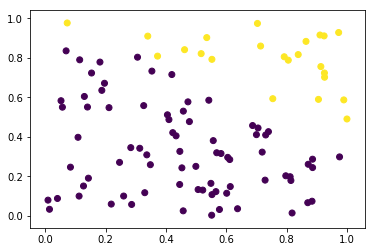

In [70]:
y = 0.3 * x1 + 0.5 * x2
y = (y>0.5).astype('int')

print (y)
plt.scatter(x1, x2, c=y)

### Define Sigmoid

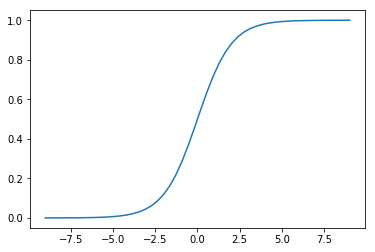

In [71]:
def sigmoid (n):
    return 1 / (1+np.exp(-n))

xx = np.linspace(start=-9, stop=9)
yy = sigmoid(xx)

plt.plot(xx, yy)

In [84]:
### learning rate
### Binary cross entropy 적용; 코드는 거의 그대로 사용 가능하다.

num_epoch = 10000

w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0) 

learning_rate = 1

for epoch in range(num_epoch):
    y_predict = sigmoid(w1 * x1 + w2 * x2 + b)
    y_predict = (y_predict > 0.5).astype('int')
    error = (y_predict !=y).mean()
    
    if error < 0.05:
        break
    
    if epoch % 10 == 0:
        print (epoch, error)
    
    
    # w1 = w1 - (y_predict-y).mean()
    # w2 = w2 - (y_predict-y).mean()
    ## 이렇게 하면, w1과 w2의 변화율이 똑같기 때문에 정상적으로 작동하지 않는다.
    
    w1 = w1 - learning_rate * ((y_predict-y)*x1).mean()
    w2 = w2 - learning_rate * ((y_predict-y)*x2).mean()
    b = b - learning_rate * (y_predict - y).mean()

    
print("----"*10)
print(epoch, error)

0 0.77
10 0.05
----------------------------------------
11 0.03


In [82]:
import pandas as pd

result = pd.DataFrame({'x1':x1, 'x2':x2, 'y(actual)':y, 'y(predict)':y_predict})
result.head(10)

,x1,x2,y(actual),y(predict)
0,0.924108,0.911474,1,1
1,0.108394,0.397362,0,0
2,0.348193,0.258439,0,0
3,0.884086,0.073352,0,0
4,0.999808,0.490243,1,1
5,0.611312,0.284591,0,0
6,0.422441,0.420998,0,0
7,0.336359,0.308431,0,0
8,0.913321,0.756004,1,1
9,0.552423,0.106813,0,0
